In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)
print("y_train",y_train.shape)

x_train (60000, 28, 28)
x_test (10000, 28, 28)
y_test (10000,)
y_train (60000,)


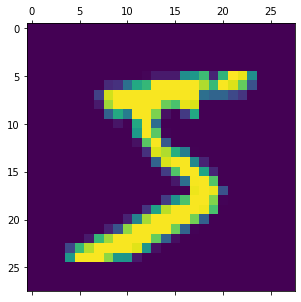

In [6]:
# display image
plt.matshow(x_train[0])

In [16]:
# Flat Array
'''x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)'''

x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0
print("x_train_flattened", x_train_flattened.shape )
print("x_test_flattened", x_test_flattened.shape )


x_train_flattened (60000, 784)
x_test_flattened (10000, 784)


In [17]:
# Neural Network with no hidden layer: Sequential Model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
    ])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()
model.fit(x_train_flattened, y_train, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4735 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9248


In [18]:
# Accuracy Score
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.9261
Test accuracy: 0.9261000156402588


In [20]:
# predict:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [23]:
y_pred

array([[1.7892350e-02, 2.8099080e-07, 4.8794203e-02, ..., 9.9967033e-01,
        8.0111742e-02, 5.2920061e-01],
       [5.1210964e-01, 8.6891688e-03, 9.9953467e-01, ..., 6.6471801e-13,
        2.5032592e-01, 1.3335173e-09],
       [5.1968562e-04, 9.9307299e-01, 6.6052741e-01, ..., 1.5367419e-01,
        3.8019809e-01, 4.4151887e-02],
       ...,
       [4.3608043e-06, 2.9719317e-06, 6.5863872e-04, ..., 1.2518492e-01,
        4.8836845e-01, 6.1729741e-01],
       [1.3772081e-04, 1.8344073e-04, 1.3316885e-04, ..., 2.8068785e-05,
        6.3987315e-01, 7.6408985e-05],
       [1.0653944e-02, 8.6226043e-10, 2.4318184e-01, ..., 1.2083531e-08,
        2.8296976e-04, 4.9160542e-07]], dtype=float32)

In [21]:
len(y_pred[0])

10

In [22]:
np.argmax(y_pred[0])

7

In [24]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print("y_pred_labels[:5]",y_pred_labels[:5])
print("y_test[:5]",y_test[:5])

y_pred_labels[:5] [7, 2, 1, 0, 4]
y_test[:5] [7 2 1 0 4]


In [26]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred_labels)

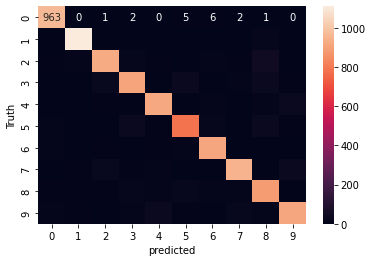

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt = "d")
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

In [33]:
x_train = x_train / 255.0
x_test = x_test / 255.0
# Neural Network with hidden layer: Sequential Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),  # Hidden layer with 10 neurons and ReLU activation
    keras.layers.Dense(10, activation='sigmoid')  # Output layer with 10 neurons and sigmoid activation
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()
model.fit(x_train, y_train, epochs=15)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3014 - accuracy: 0.1113
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3005 - accuracy: 0.1124
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2987 - accuracy: 0.1124
Epoch 4/